<a href="https://colab.research.google.com/github/nanda3-vit/HeartDiseasePractice/blob/main/FraminghamHeartData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('/content/sample_data/5.FraminghamHDataset.csv')
print(df.shape)
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/

(4240, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77,0
1,0,46,2,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76,0
2,1,48,1,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70,0
3,0,61,3,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103,1
4,0,46,3,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85,0


In [2]:
df1 = df.dropna(how = 'any', axis = 0)
print(df1.shape)
df1.head()

(4090, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77,0
1,0,46,2,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76,0
2,1,48,1,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70,0
3,0,61,3,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103,1
4,0,46,3,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85,0


In [6]:
print('Data Last 5 Rows Show\n')
df.tail()

Data Last 5 Rows Show



,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86,0
4236,0,44,1,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,75,0
4237,0,52,2,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107,0
4238,1,40,3,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72,0
4239,0,39,3,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80,0


In [8]:
print('Data Show Describe\n')
df.describe()

Data Show Describe



,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.955189,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.326415,0.151887
std,0.495027,8.572942,1.018522,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,22.919885,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
print('Data Show Info\n')
df.info()

Data Show Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   int64  
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          4240 non-null   int64  
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(7), int64(9)
memory usage: 530.1 

In [11]:
print('Data Show Columns:\n')
df.columns

Data Show Columns:



Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [12]:
print('Data Shape Show\n')
df.shape

Data Shape Show



(4240, 16)

In [13]:
print('Data Sum of Null Values \n')
df.isnull().sum()

Data Sum of Null Values 



male                0
age                 0
education           0
currentSmoker       0
cigsPerDay         29
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            50
sysBP               0
diaBP               0
BMI                19
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

In [15]:
df.isnull().values.any()

True

In [16]:
print('Gender')
print(df1['male'].value_counts(normalize = True))
print('----')
print('\n')

print('Education')
print(df1['education'].value_counts(normalize = True))
print('----')
print('\n')

print('BP Medication')
print(df1['BPMeds'].value_counts(normalize = True))
print('----')
print('\n')

print('Stroke')
print(df1['prevalentStroke'].value_counts(normalize = True))
print('----')
print('\n')

print('Hypertension')
print(df1['prevalentHyp'].value_counts(normalize = True))
print('----')
print('\n')

print('Diabetes')
print(df1['diabetes'].value_counts(normalize = True))
print('----')
print('\n')

Gender
0    0.565281
1    0.434719
Name: male, dtype: float64
----


Education
1    0.429095
2    0.295844
3    0.162836
4    0.112225
Name: education, dtype: float64
----


BP Medication
0.0    0.97066
1.0    0.02934
Name: BPMeds, dtype: float64
----


Stroke
0    0.994621
1    0.005379
Name: prevalentStroke, dtype: float64
----


Hypertension
0    0.690709
1    0.309291
Name: prevalentHyp, dtype: float64
----


Diabetes
0    0.974572
1    0.025428
Name: diabetes, dtype: float64
----




In [17]:
disease = df1.groupby('TenYearCHD')

print('Gender')
print(disease['male'].value_counts(normalize = True))
print('----')
print('\n')

print('Education')
print(disease['education'].value_counts(normalize = True))
print('----')
print('\n')

print('BP Medication')
print(disease['BPMeds'].value_counts(normalize = True))
print('----')
print('\n')

print('Stroke')
print(disease['prevalentStroke'].value_counts(normalize = True))
print('----')
print('\n')

print('Hypertension')
print(disease['prevalentHyp'].value_counts(normalize = True))
print('----')
print('\n')

print('Diabetes')
print(disease['diabetes'].value_counts(normalize = True))
print('----')
print('\n')

Gender
TenYearCHD  male
0           0       0.585226
            1       0.414774
1           1       0.548282
            0       0.451718
Name: male, dtype: float64
----


Education
TenYearCHD  education
0           1            0.411900
            2            0.308135
            3            0.167002
            4            0.112963
1           1            0.527005
            2            0.225859
            3            0.139116
            4            0.108020
Name: education, dtype: float64
----


BP Medication
TenYearCHD  BPMeds
0           0.0       0.976717
            1.0       0.023283
1           0.0       0.936170
            1.0       0.063830
Name: BPMeds, dtype: float64
----


Stroke
TenYearCHD  prevalentStroke
0           0                  0.995976
            1                  0.004024
1           0                  0.986907
            1                  0.013093
Name: prevalentStroke, dtype: float64
----


Hypertension
TenYearCHD  prevalentHyp
0           

In [18]:
print('Gender')
contigency= pd.crosstab(df1['male'], df['TenYearCHD']) 
c, p, dof, expected = chi2_contingency(contigency) 
print(p)
print('____')

print('Education')
contigency= pd.crosstab(df1['education'], df['TenYearCHD']) 
c, p, dof, expected = chi2_contingency(contigency) 
print(p)
print('____')

print('BP Medication')
contigency= pd.crosstab(df1['BPMeds'], df['TenYearCHD']) 
c, p, dof, expected = chi2_contingency(contigency) 
print(p)
print('____')

print('Stroke')
contigency= pd.crosstab(df1['prevalentStroke'], df['TenYearCHD']) 
c, p, dof, expected = chi2_contingency(contigency) 
print(p)
print('____')

print('Hypertension')
contigency= pd.crosstab(df1['prevalentHyp'], df['TenYearCHD']) 
c, p, dof, expected = chi2_contingency(contigency) 
print(p)
print('____')

print('Diabetes')
contigency= pd.crosstab(df1['diabetes'], df['TenYearCHD']) 
c, p, dof, expected = chi2_contingency(contigency) 
print(p)
print('____')

Gender
1.0905756934747653e-09
____
Education
1.0652544232437144e-06
____
BP Medication
8.914418459234405e-08
____
Stroke
0.011510313900085
____
Hypertension
1.9946452640354794e-28
____
Diabetes
2.6554677309985426e-08
____


In [19]:
num_var = ['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'cigsPerDay']
df_num = df1[num_var]

In [20]:
for i in np.arange(0.0, 0.5, 0.01):
    sel = VarianceThreshold(threshold=i) #Checking different Variance Thresholds
    sel.fit(df_num)
    quasi_constant = df_num.columns[~sel.get_support()]
    print('Variance Threshold = ', i)
    print(quasi_constant)
    print('----')

Variance Threshold =  0.0
Index([], dtype='object')
----
Variance Threshold =  0.01
Index([], dtype='object')
----
Variance Threshold =  0.02
Index([], dtype='object')
----
Variance Threshold =  0.03
Index([], dtype='object')
----
Variance Threshold =  0.04
Index([], dtype='object')
----
Variance Threshold =  0.05
Index([], dtype='object')
----
Variance Threshold =  0.06
Index([], dtype='object')
----
Variance Threshold =  0.07
Index([], dtype='object')
----
Variance Threshold =  0.08
Index([], dtype='object')
----
Variance Threshold =  0.09
Index([], dtype='object')
----
Variance Threshold =  0.1
Index([], dtype='object')
----
Variance Threshold =  0.11
Index([], dtype='object')
----
Variance Threshold =  0.12
Index([], dtype='object')
----
Variance Threshold =  0.13
Index([], dtype='object')
----
Variance Threshold =  0.14
Index([], dtype='object')
----
Variance Threshold =  0.15
Index([], dtype='object')
----
Variance Threshold =  0.16
Index([], dtype='object')
----
Variance Thresho

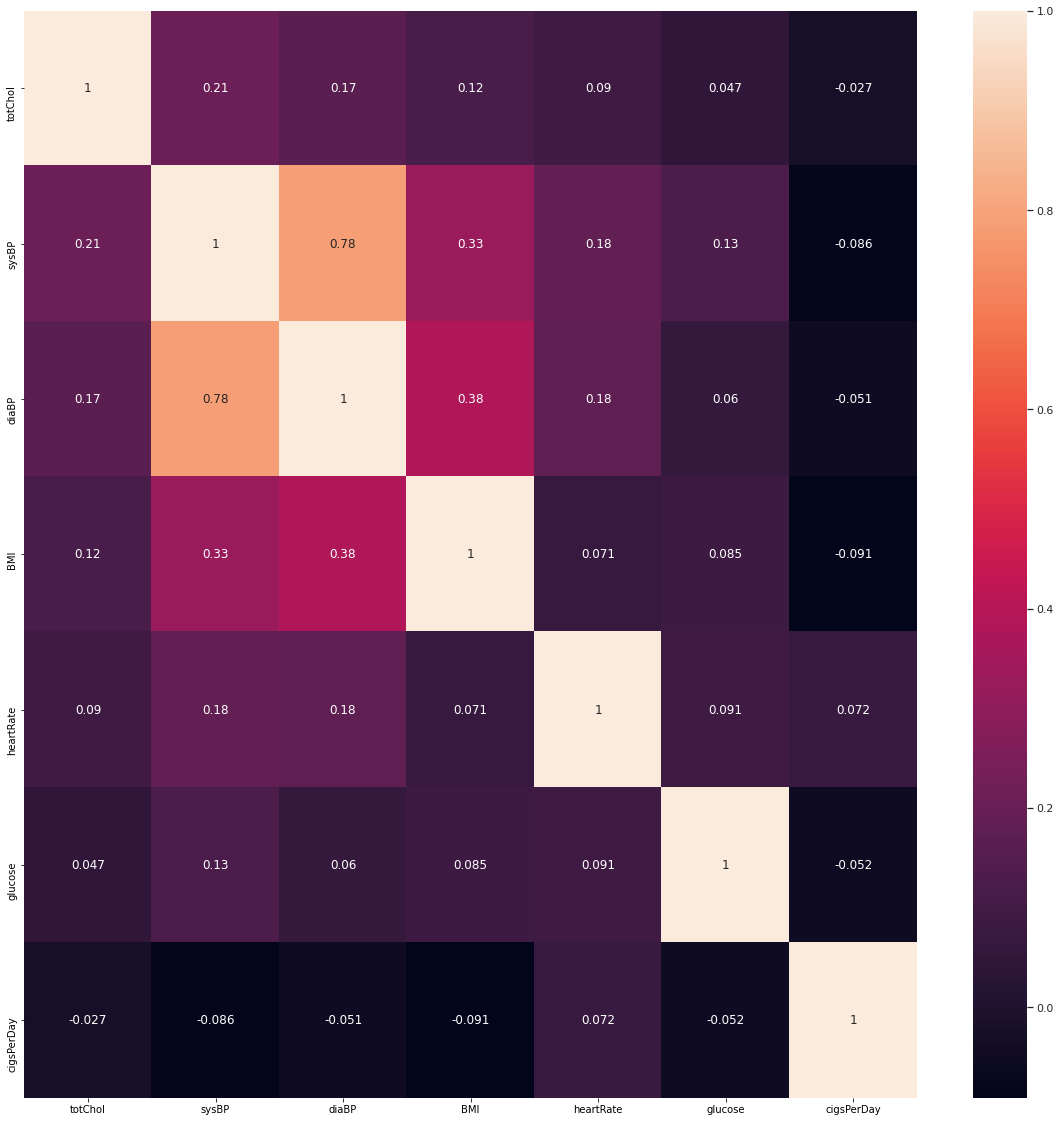

In [21]:
fig, ax = plt.subplots(figsize=(20,20))
sns.set(font_scale=1)
sns.heatmap(df_num.corr(), annot = True, ax = ax)

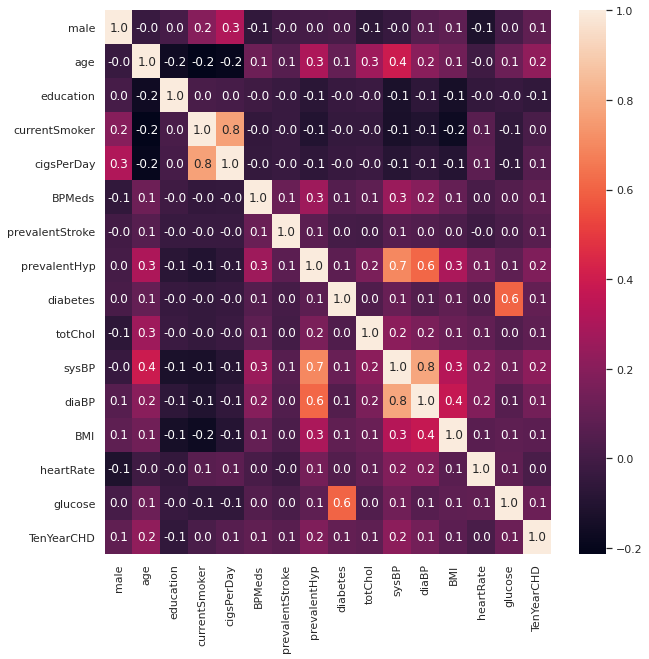

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

In [24]:
disease['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'cigsPerDay'].agg(['mean', 'median'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


totChol              sysBP  ... glucose cigsPerDay       
                  mean median        mean  ...  median       mean median
TenYearCHD                                 ...                          
0           235.152918  232.0  130.254671  ...      77   8.681230    0.0
1           245.238953  241.0  143.454173  ...      78  10.783961    3.0

[2 rows x 14 columns]

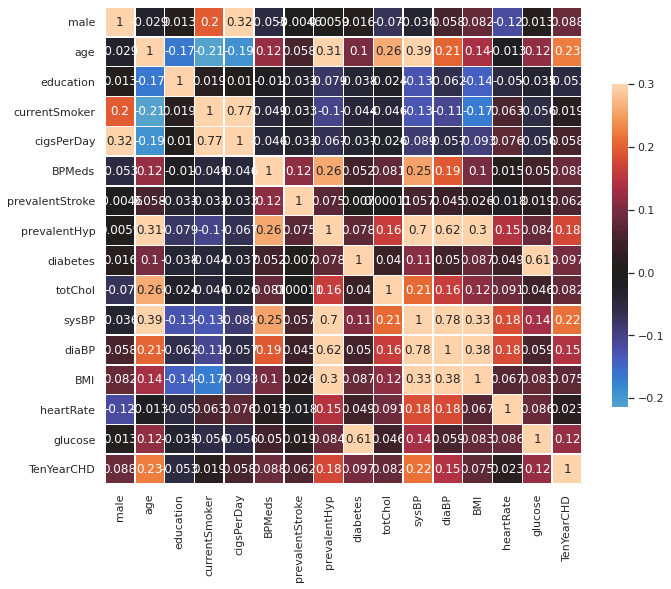

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()

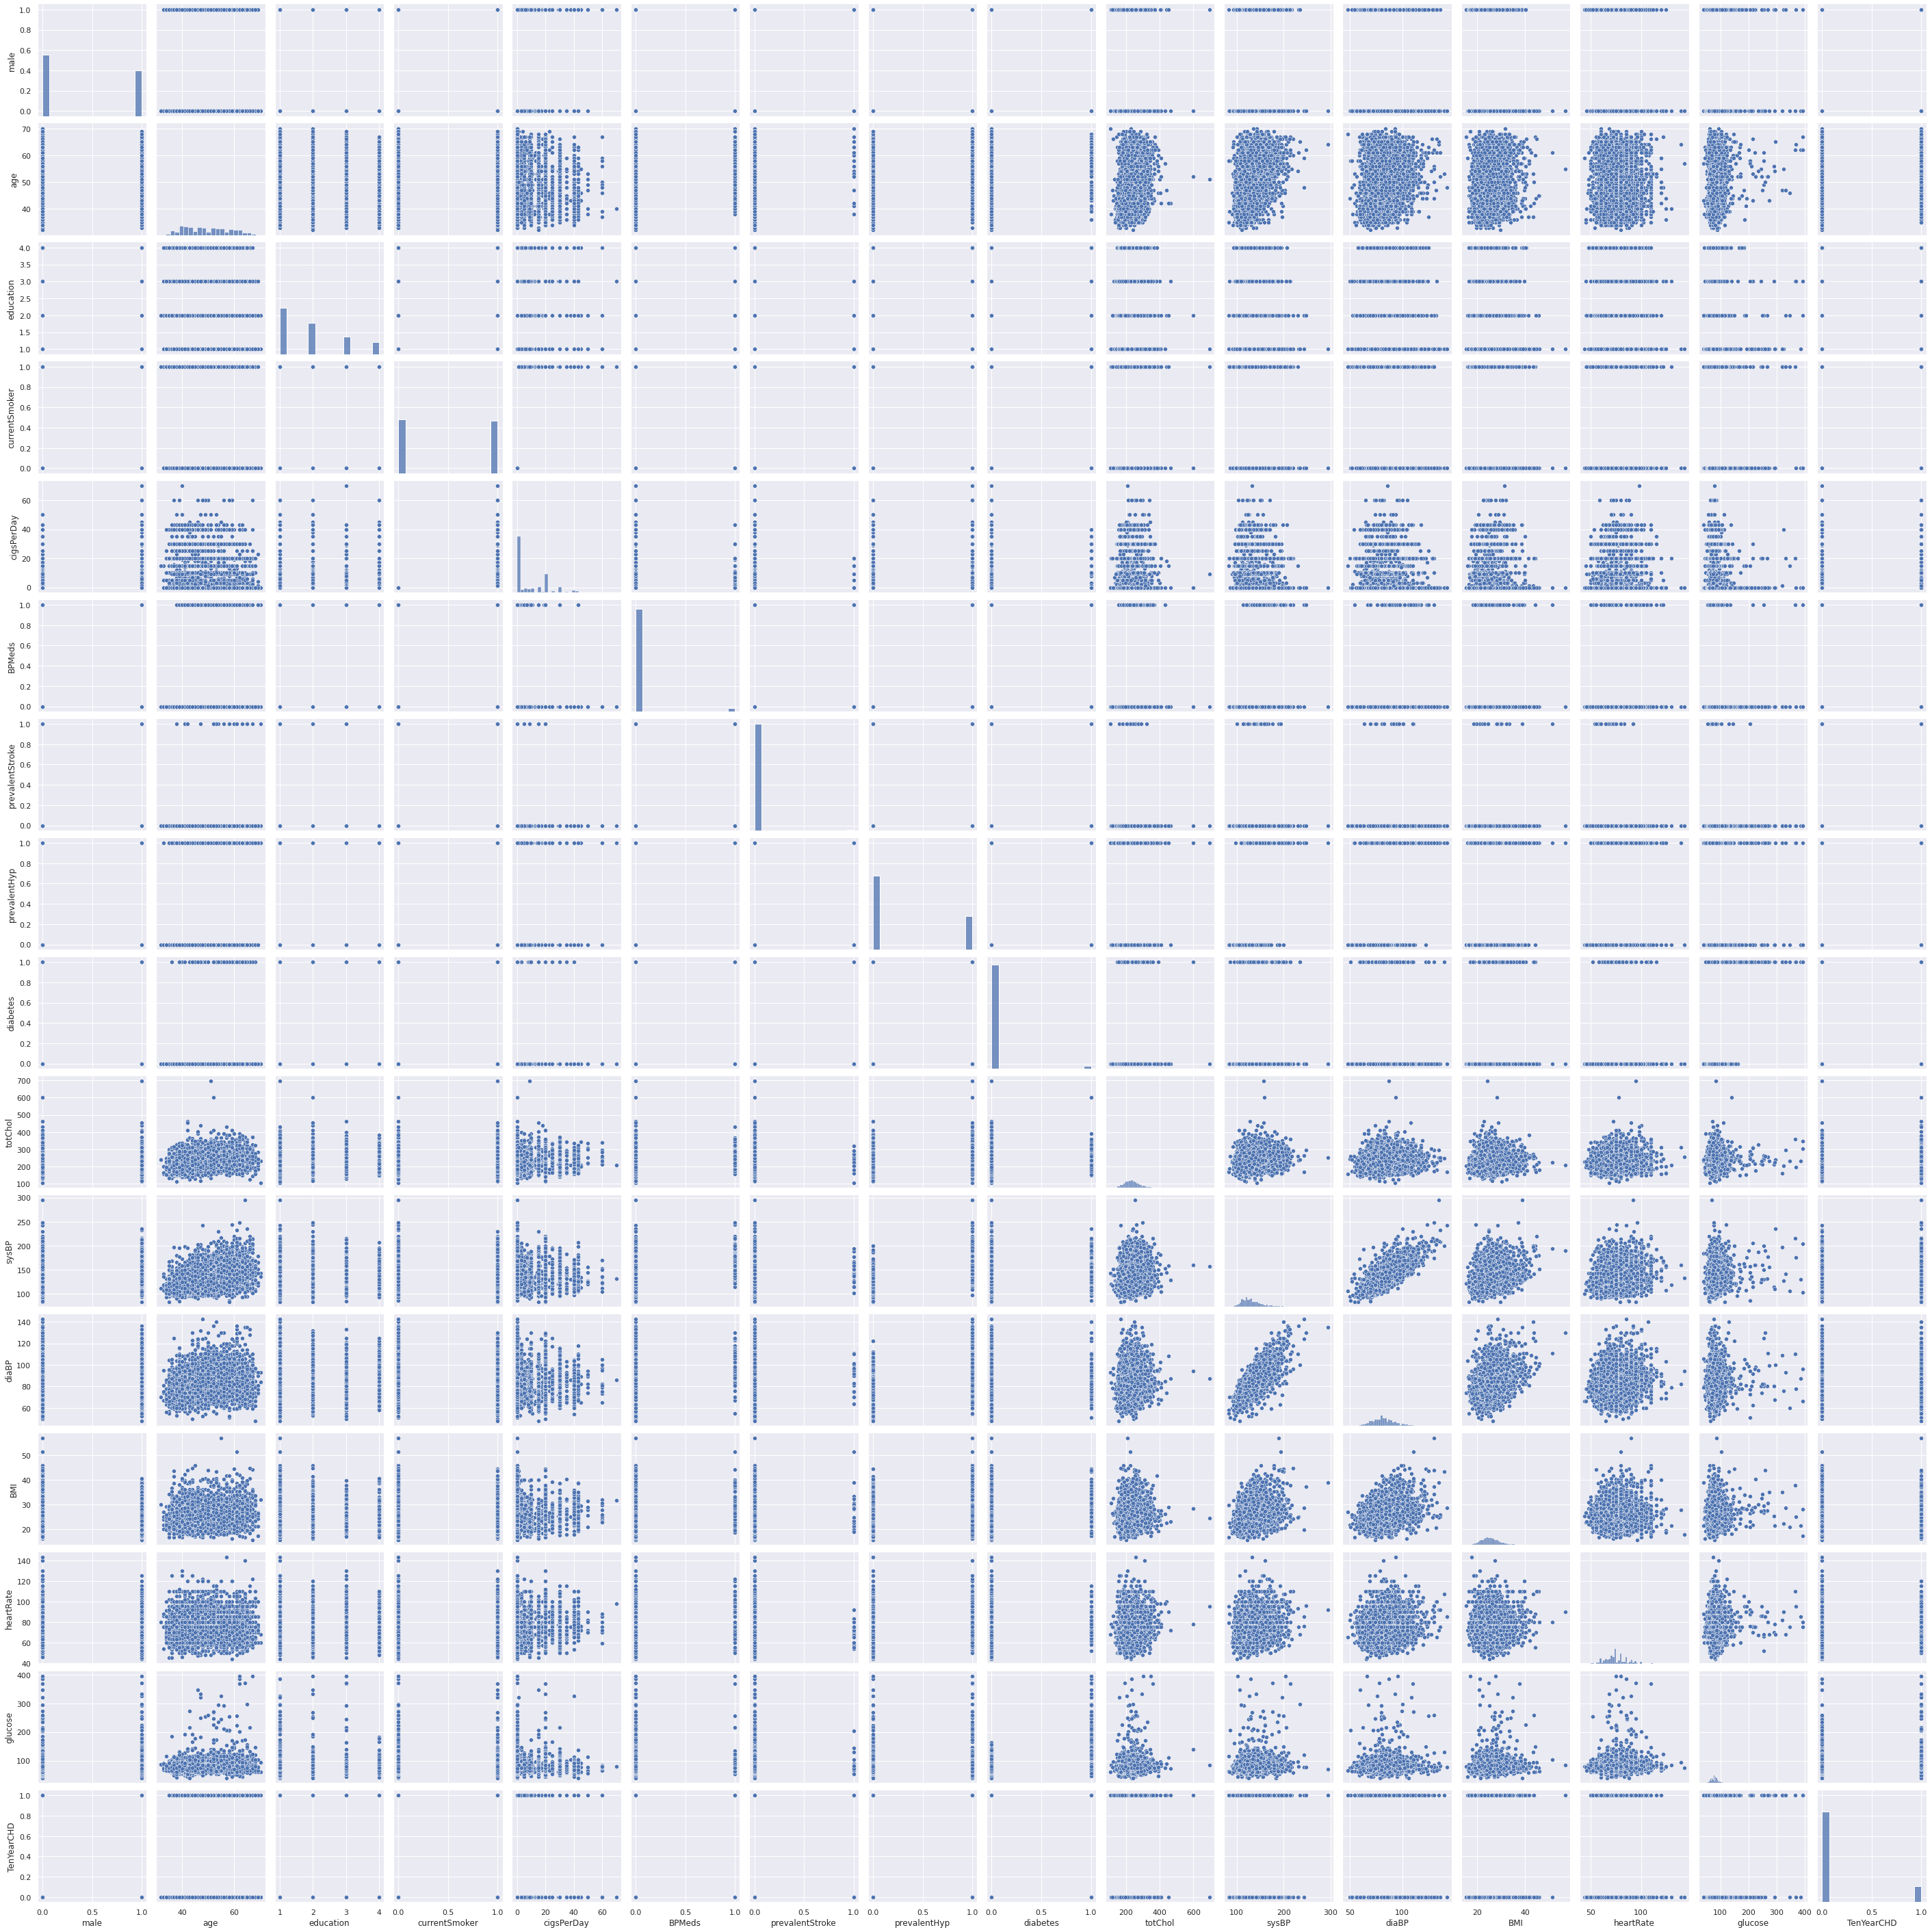

In [27]:
sns.pairplot(df)
plt.show()

In [30]:
df.age.value_counts()[:10]

40    192
46    182
42    180
41    174
48    173
39    170
44    166
45    162
43    159
52    149
Name: age, dtype: int64

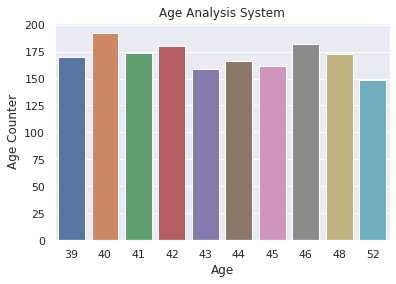

In [32]:
sns.barplot(x=df.age.value_counts()[:10].index,y=df.age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age Counter')
plt.title('Age Analysis System')
plt.show()

In [33]:
minAge=min(df.age)
maxAge=max(df.age)
meanAge=df.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 32
Max Age : 70
Mean Age : 49.58018867924528


In [34]:
young_ages=df[(df.age>=29)&(df.age<40)]
middle_ages=df[(df.age>=40)&(df.age<55)]
elderly_ages=df[(df.age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 556
Middle Ages : 2367
Elderly Ages : 1172


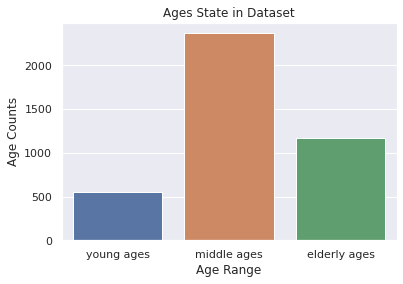

In [35]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages State in Dataset')
plt.show()

In [36]:
df['AgeRange']=0
youngAge_index=df[(df.age>=29)&(df.age<40)].index
middleAge_index=df[(df.age>=40)&(df.age<55)].index
elderlyAge_index=df[(df.age>55)].index

In [37]:
for index in elderlyAge_index:
    df.loc[index,'AgeRange']=2
    
for index in middleAge_index:
    df.loc[index,'AgeRange']=1

for index in youngAge_index:
    df.loc[index,'AgeRange']=0

No handles with labels found to put in legend.


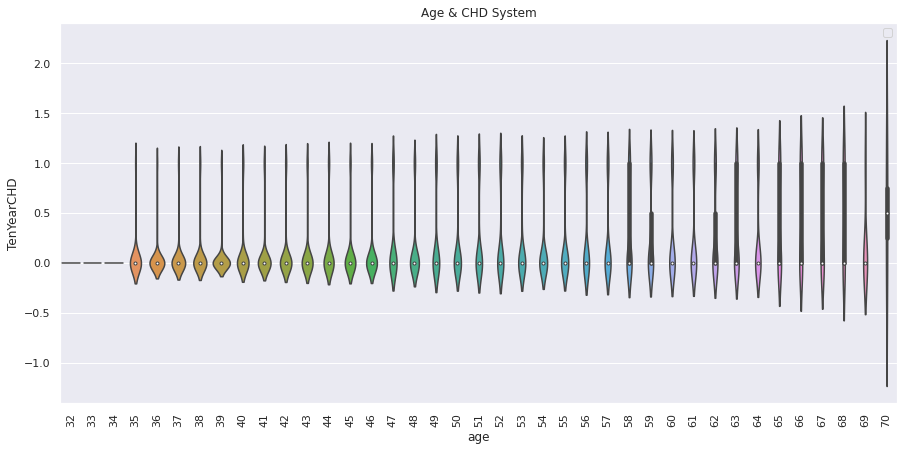

In [43]:
plt.figure(figsize=(15,7))
sns.violinplot(x=df.age,y=df.TenYearCHD)
plt.xticks(rotation=90)
plt.legend()
plt.title("Age & CHD System")
plt.show()

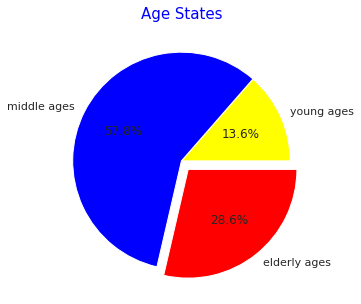

In [44]:
colors = ['yellow','blue','red']
explode = [0,0,0.1]
plt.figure(figsize = (5,5))
#plt.pie([target_0_agerang_0,target_1_agerang_0], explode=explode, labels=['Target 0 Age Range 0','Target 1 Age Range 0'], colors=colors, autopct='%1.1f%%')
plt.pie([len(young_ages),len(middle_ages),len(elderly_ages)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.title('Age States',color = 'blue',fontsize = 15)
plt.show()

In [46]:
df.male.value_counts()

0    2420
1    1820
Name: male, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


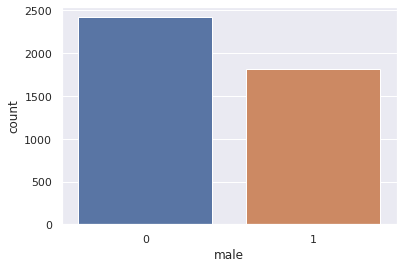

In [47]:
sns.countplot(df.male)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


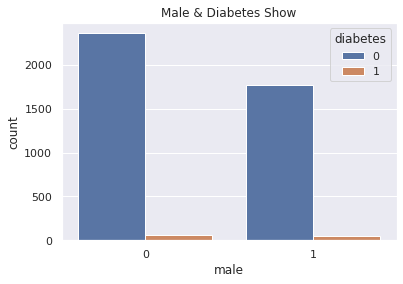

In [51]:
sns.countplot(df.male,hue=df.diabetes)
plt.title('Male & Diabetes Show')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


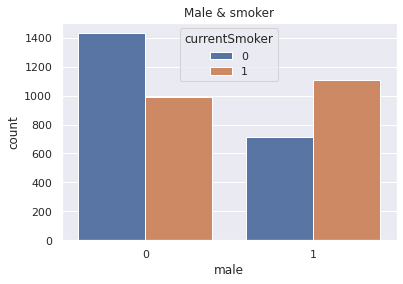

In [52]:
sns.countplot(df.male,hue=df.currentSmoker)
plt.title('Male & smoker')
plt.show()

In [53]:
total_genders_count=len(df.male)
male_count=len(df[df['male']==1])
female_count=len(df[df['male']==0])
print('Total Genders :',total_genders_count)
print('Male Count    :',male_count)
print('Female Count  :',female_count)

Total Genders : 4240
Male Count    : 1820
Female Count  : 2420


In [54]:
print("Male State: {:.2f}%".format((male_count / (total_genders_count)*100)))
print("Female State: {:.2f}%".format((female_count / (total_genders_count)*100)))

Male State: 42.92%
Female State: 57.08%


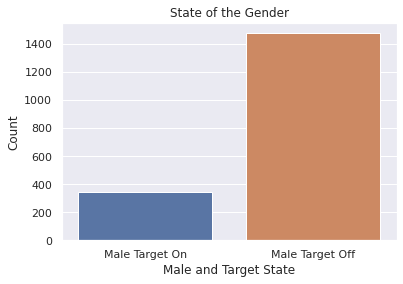

In [55]:
male_andtarget_on=len(df[(df.male==1)&(df['TenYearCHD']==1)])
male_andtarget_off=len(df[(df.male==1)&(df['TenYearCHD']==0)])
####
sns.barplot(x=['Male Target On','Male Target Off'],y=[male_andtarget_on,male_andtarget_off])
plt.xlabel('Male and Target State')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

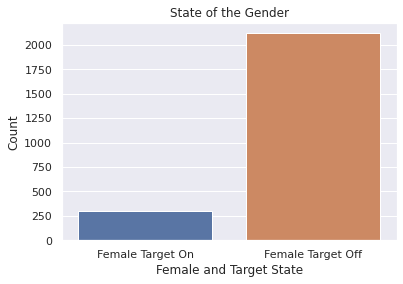

In [57]:
female_andtarget_on=len(df[(df.male==0)&(df['TenYearCHD']==1)])
female_andtarget_off=len(df[(df.male==0)&(df['TenYearCHD']==0)])
####
sns.barplot(x=['Female Target On','Female Target Off'],y=[female_andtarget_on,female_andtarget_off])
plt.xlabel('Female and Target State')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

In [66]:
df.sample(frac=0.01)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,AgeRange
879,1,49,4,0,0.0,0.0,0,0,0,264.0,127.5,81.0,25.16,76.0,70,0,1
2534,1,50,1,0,0.0,0.0,0,1,0,167.0,159.0,95.0,25.20,75.0,87,0,1
2602,0,60,2,0,0.0,0.0,0,0,0,354.0,130.0,82.5,26.76,65.0,79,0,2
2533,1,48,1,0,0.0,0.0,0,0,0,201.0,117.5,80.0,23.68,66.0,85,0,1
1137,0,45,4,1,20.0,0.0,0,0,0,192.0,132.0,79.0,24.53,68.0,112,0,1
1552,0,46,1,1,20.0,0.0,0,0,0,182.0,117.0,78.0,22.15,72.0,59,0,1
3910,0,40,2,0,0.0,0.0,0,0,0,202.0,139.0,85.0,22.01,85.0,64,0,1
1343,0,44,4,1,25.0,0.0,0,0,0,200.0,111.0,79.0,27.29,95.0,74,0,1
894,0,42,1,1,20.0,0.0,0,1,0,199.0,141.0,92.0,43.69,80.0,60,1,1
1706,0,53,2,1,30.0,0.0,0,0,0,250.0,149.5,95.0,28.02,68.0,75,0,1


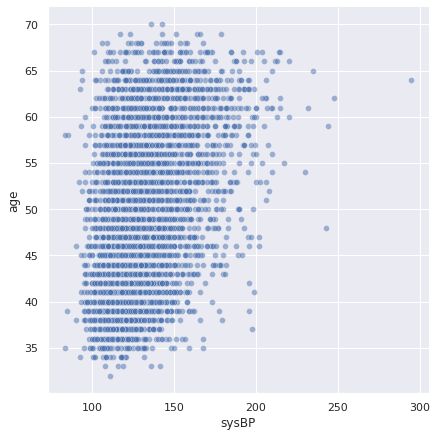

In [68]:
sns.relplot(x="sysBP", y="age",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

In [69]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,AgeRange
0,1,39,4,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77,0,0
1,0,46,2,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76,0,1
2,1,48,1,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70,0,1
3,0,61,3,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103,1,2
4,0,46,3,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85,0,1


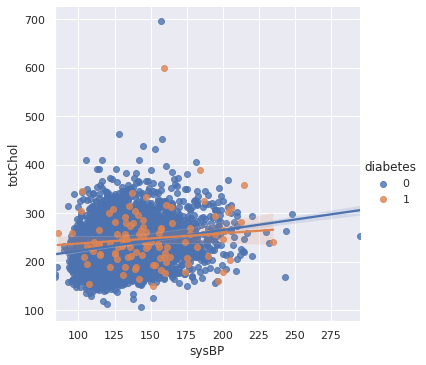

In [71]:
sns.lmplot(x="sysBP", y="totChol",data=df,hue="diabetes")
plt.show()

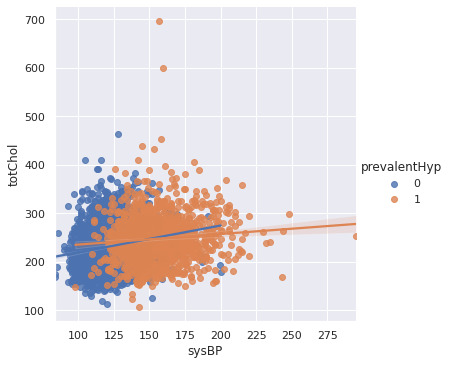

In [72]:
sns.lmplot(x="sysBP", y="totChol",data=df,hue="prevalentHyp")
plt.show()

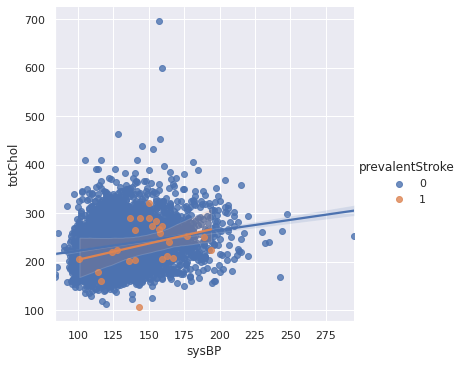

In [73]:
sns.lmplot(x="sysBP", y="totChol",data=df,hue="prevalentStroke")
plt.show()

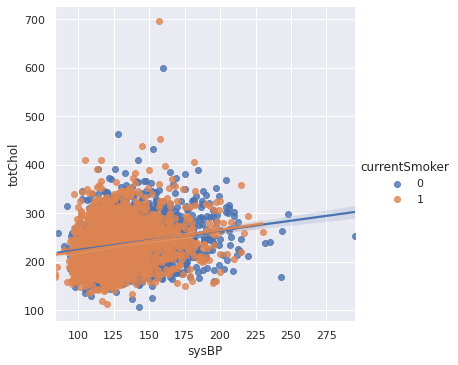

In [74]:
sns.lmplot(x="sysBP", y="totChol",data=df,hue="currentSmoker")
plt.show()

In [77]:
target_0_agerang_0=len(df[(df.TenYearCHD==0)&(df.AgeRange==0)])
target_1_agerang_0=len(df[(df.TenYearCHD==1)&(df.AgeRange==0)])

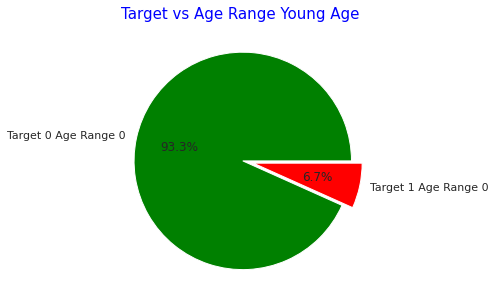

In [78]:
colors = ['green','red']
explode = [0,0.1]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_0,target_1_agerang_0], explode=explode, labels=['Target 0 Age Range 0','Target 1 Age Range 0'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Young Age ',color = 'blue',fontsize = 15)
plt.show()

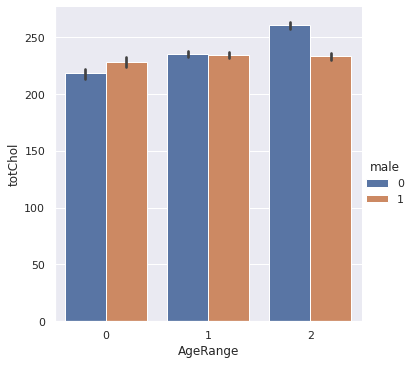

In [84]:
g = sns.catplot(x="AgeRange", y="totChol",
                 hue="male",
                 data=df, kind="bar")
plt.show()

In [88]:
male_young_t_1=df[(df['male']==1)&(df['AgeRange']==0)&(df['TenYearCHD']==1)]
male_middle_t_1=df[(df['male']==1)&(df['AgeRange']==1)&(df['TenYearCHD']==1)]
male_elderly_t_1=df[(df['male']==1)&(df['AgeRange']==2)&(df['TenYearCHD']==1)]
print(len(male_young_t_1))
print(len(male_middle_t_1))
print(len(male_elderly_t_1))

24
173
146


No handles with labels found to put in legend.


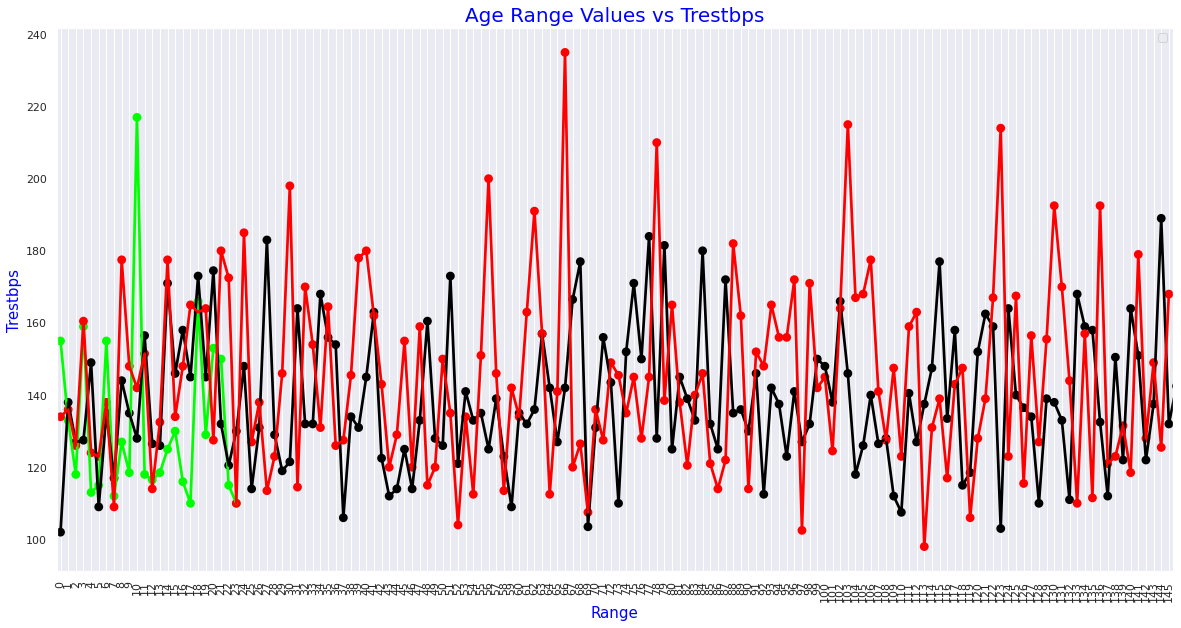

In [90]:
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x=np.arange(len(male_young_t_1)),y=male_young_t_1.sysBP,color='lime',alpha=0.8,label='Young')
sns.pointplot(x=np.arange(len(male_middle_t_1)),y=male_middle_t_1.sysBP,color='black',alpha=0.8,label='Middle')
sns.pointplot(x=np.arange(len(male_elderly_t_1)),y=male_elderly_t_1.sysBP,color='red',alpha=0.8,label='Elderly')
plt.xlabel('Range',fontsize = 15,color='blue')
plt.xticks(rotation=90)
plt.legend(loc='upper right',frameon=True)
plt.ylabel('Trestbps',fontsize = 15,color='blue')
plt.title('Age Range Values vs Trestbps',fontsize = 20,color='blue')
plt.grid()
plt.show()

In [91]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,AgeRange
0,1,39,4,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77,0,0
1,0,46,2,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76,0,1
2,1,48,1,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70,0,1
3,0,61,3,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103,1,2
4,0,46,3,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85,0,1


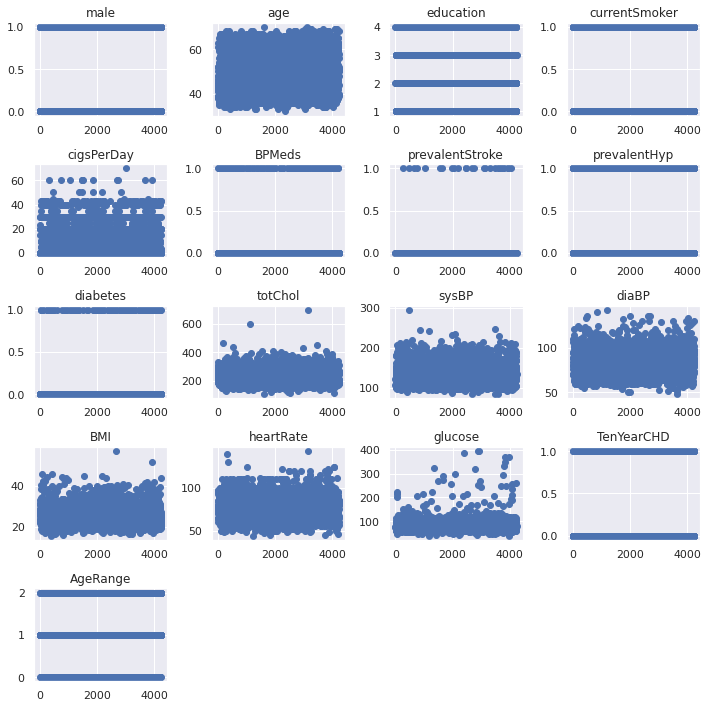

In [94]:
for i,col in enumerate(df.columns.values):
    plt.subplot(5,4,i+1)
    plt.scatter([i for i in range(4240)],df[col].values.tolist())
    plt.title(col)
    fig,ax=plt.gcf(),plt.gca()
    fig.set_size_inches(10,10)
    plt.tight_layout()
plt.show()

In [96]:
#Let's see how the correlation values between them
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,AgeRange
male,1.000000,-0.029014,0.013361,0.197026,0.317143,-0.052504,-0.004550,0.005853,0.015693,-0.070413,-0.035879,0.058199,0.081871,-0.116932,0.013160,0.088374,-0.011034
age,-0.029014,1.000000,-0.165283,-0.213662,-0.192959,0.123052,0.057679,0.306799,0.101314,0.262554,0.394053,0.205586,0.136096,-0.012843,0.118383,0.225408,0.799224
education,0.013361,-0.165283,1.000000,0.019399,0.010251,-0.010493,-0.032910,-0.078565,-0.038215,-0.024139,-0.126062,-0.062334,-0.140016,-0.049585,-0.034944,-0.053002,-0.124363
currentSmoker,0.197026,-0.213662,0.019399,1.000000,0.769774,-0.048927,-0.032980,-0.103710,-0.044285,-0.046488,-0.130281,-0.107933,-0.167857,0.062686,-0.055759,0.019448,-0.139457
cigsPerDay,0.317143,-0.192959,0.010251,0.769774,1.000000,-0.046155,-0.032711,-0.066645,-0.037089,-0.026479,-0.088797,-0.056715,-0.093293,0.075564,-0.056451,0.057755,-0.128351
BPMeds,-0.052504,0.123052,-0.010493,-0.048927,-0.046155,1.000000,0.117370,0.261067,0.052060,0.080623,0.254194,0.194122,0.100702,0.015230,0.049502,0.087519,0.115622
prevalentStroke,-0.004550,0.057679,-0.032910,-0.032980,-0.032711,0.117370,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.025909,-0.017674,0.019201,0.061823,0.048059
prevalentHyp,0.005853,0.306799,-0.078565,-0.103710,-0.066645,0.261067,0.074791,1.000000,0.077752,0.163632,0.696656,0.615840,0.301344,0.146815,0.083758,0.177458,0.243992
diabetes,0.015693,0.101314,-0.038215,-0.044285,-0.037089,0.052060,0.006955,0.077752,1.000000,0.040348,0.111265,0.050260,0.087068,0.048986,0.606085,0.097344,0.074802
totChol,-0.070413,0.262554,-0.024139,-0.046488,-0.026479,0.080623,0.000105,0.163632,0.040348,1.000000,0.208734,0.164698,0.115992,0.091127,0.046310,0.082369,0.196165
